# Data Preprocessing

## Steps:

1) Load the data, from our csv files. we will be using official data from the FED, and the BEA, aswell as BLS. 
2) We will be using nominal data, rather than real data initially, because we will then be applying the 'cpi-universal' to convert all data to real data.
3) We will then apply pct_change to the data to make it stationary.
4) We then properly label every column and we may further preprocess the data if necessary.

In [431]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from funcs import loading_csv_functions
from funcs.loading_csv_functions import merge_new_data, merge_new_data_and_apply_pct_change, prepare_cpi_data, preprocess_and_merge
from funcs.loading_csv_functions import load_and_process_cpi_data
def name(self) -> any:
    return self.attribute

import os

In [432]:

# Example Usage
base_path = '/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/CPI'  # Replace this with the actual base path
final_df = load_and_process_cpi_data(base_path)
print(final_df.head())  # Print the first few rows to verify the output

display(final_df)

cpi_data = final_df

         Date  CPI-Energy  CPI-Housing  CPI-Medical  CPI-Transportation  \
0  1999-12-01       100.0        100.0        100.0               100.0   
1  2000-01-01       100.2        100.7        100.5                99.9   
2  2000-02-01       103.7        101.4        101.1               100.8   
3  2000-03-01       108.9        101.8        101.5               103.0   
4  2000-04-01       107.8        101.8        101.7               102.8   

   CPI-Universal  CPI-Core  
0          100.0     100.0  
1          100.3     100.3  
2          100.9     100.7  
3          101.6     101.2  
4          101.6     101.3  


,Date,CPI-Energy,CPI-Housing,CPI-Medical,CPI-Transportation,CPI-Universal,CPI-Core
0,1999-12-01,100.000,100.000,100.000,100.000,100.000,100.000
1,2000-01-01,100.200,100.700,100.500,99.900,100.300,100.300
2,2000-02-01,103.700,101.400,101.100,100.800,100.900,100.700
3,2000-03-01,108.900,101.800,101.500,103.000,101.600,101.200
4,2000-04-01,107.800,101.800,101.700,102.800,101.600,101.300
...,...,...,...,...,...,...,...
287,2023-11-01,227.507,187.572,209.164,177.117,171.219,162.427
288,2023-12-01,221.036,188.075,209.779,174.587,171.015,162.555
289,2024-01-01,221.527,189.601,211.222,173.534,171.910,163.434
290,2024-02-01,226.800,190.476,211.196,176.716,173.018,164.375


In [433]:
import pandas as pd


cpi_data = prepare_cpi_data(cpi_data)
display(cpi_data.head(5))


,Date,CPI-Energy,CPI-Housing,CPI-Medical,CPI-Transportation,CPI-Universal,CPI-Core
0,1999-12-01,100.0,100.0,100.0,100.0,100.0,100.0
1,2000-01-01,100.2,100.7,100.5,99.9,100.3,100.3
2,2000-02-01,103.7,101.4,101.1,100.8,100.9,100.7
3,2000-03-01,108.9,101.8,101.5,103.0,101.6,101.2
4,2000-04-01,107.8,101.8,101.7,102.8,101.6,101.3


# Switching Plans: Using more extensive data.

the date time range is too short, as it only measures from around 1999. We will need decades of data, and so we will be using a different dataset. 


In [434]:
def merge_interest_data( new_data, new_name, new_data_col_name):
    new_data['DATE'] = pd.to_datetime(new_data['DATE'])
    
    # Merge the dataframes on the 'Date' column
    merged_data = pd.merge(cpi_data, new_data, left_on='Date', right_on='DATE', how='left')
    
    # Drop the extra 'DATE' column from the new data
    merged_data.drop('DATE', axis=1, inplace=True)

    # Rename the new data column to 'Real GDP'
    merged_data.rename(columns={new_data_col_name: new_name}, inplace=True)
    return merged_data

In [435]:
import pandas as pd

def load_and_rename_date_column(csv_filepath):
    # Load the data from a CSV file
    data = pd.read_csv(csv_filepath)
    
    # Rename the 'DATE' column to 'Date'
    data.rename(columns={'DATE': 'Date'}, inplace=True)
    
    return data

# Example usage
file_path = 'Data/Federal_Funds_Effective_Rate/FEDFUNDS.csv'
fed_funds_data = load_and_rename_date_column(file_path)

# Display the first few rows to verify
display(fed_funds_data.head())

cpi_data = fed_funds_data


,Date,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


# GDP

In [436]:


# Example usage:

# Your existing cpi_data is already prepared using prepare_cpi_data function

# New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/GDP/GDP/GDP.csv')
new_name = 'GDP'
new_data_col_name = 'GDP'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name, new_data_col_name)

# Display the first 20 rows to verify
display(cpi_data.head(20))

,Date,FEDFUNDS,GDP
0,1954-07-01,0.80,390.996
1,1954-08-01,1.22,NaN
2,1954-09-01,1.07,NaN
3,1954-10-01,0.85,399.734
4,1954-11-01,0.83,NaN
5,1954-12-01,1.28,NaN
6,1955-01-01,1.39,413.073
7,1955-02-01,1.29,NaN
8,1955-03-01,1.35,NaN
9,1955-04-01,1.43,421.532


# Universal Price Inflation: CPI

In [437]:
# Example usage:

# Your existing cpi_data is already prepared using prepare_cpi_data function

# New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/CPI/CPI-Universal/CPIAUCSL.csv')
new_name = 'CPIAUCSL'
new_data_col_name = 'CPIAUCSL'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name, new_data_col_name)

# Display the first 20 rows to verify
display(cpi_data.head(20))

,Date,FEDFUNDS,GDP,CPIAUCSL
0,1954-07-01,0.80,390.996,26.86
1,1954-08-01,1.22,NaN,26.85
2,1954-09-01,1.07,NaN,26.81
3,1954-10-01,0.85,399.734,26.72
4,1954-11-01,0.83,NaN,26.78
5,1954-12-01,1.28,NaN,26.77
6,1955-01-01,1.39,413.073,26.77
7,1955-02-01,1.29,NaN,26.82
8,1955-03-01,1.35,NaN,26.79
9,1955-04-01,1.43,421.532,26.79


# CPI- Shelter


In [438]:
# New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/CPI/CPI-Housing/CUSR0000SAH1.csv')
new_name = 'CUSR0000SAH1'
new_data_col_name = 'CUSR0000SAH1'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name, new_data_col_name)

# Display the first 20 rows to verify
display(cpi_data.head(20))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1
0,1954-07-01,0.80,390.996,26.86,22.5
1,1954-08-01,1.22,NaN,26.85,22.5
2,1954-09-01,1.07,NaN,26.81,22.6
3,1954-10-01,0.85,399.734,26.72,22.6
4,1954-11-01,0.83,NaN,26.78,22.6
5,1954-12-01,1.28,NaN,26.77,22.7
6,1955-01-01,1.39,413.073,26.77,22.7
7,1955-02-01,1.29,NaN,26.82,22.7
8,1955-03-01,1.35,NaN,26.79,22.7
9,1955-04-01,1.43,421.532,26.79,22.7


# Core Price Inflation:

In [439]:
# New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/CPI/CPI-Core/CPILFESL.csv')
new_name = 'CPILFESL'
new_data_col_name = 'CPILFESL'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name, new_data_col_name)

# Display the first 20 rows to verify
display(cpi_data.head(20))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL
0,1954-07-01,0.80,390.996,26.86,22.5,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN


# Personal Consumption Expenditure


In [440]:
# New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Personal_Consumption/PCE.csv')
new_name = 'PCE'
new_data_col_name = 'PCE'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name, new_data_col_name)

display(cpi_data.head(20))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN


# Private Residential Fixed Investment

In [441]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Private_Residential_Fixed_Investment/private_residential_fixed_investment.csv')
new_name = 'PRFI'
new_data_col_name = 'PRFI'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005


# Private Non-Residential Investment 


In [442]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Private_Nonresidential_Fixed_Investment/PNFI.csv')
new_name = 'PNFI'
new_data_col_name = 'PNFI'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063


# Exports of Goods and Services

In [443]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Exports_of_Goods_and_Services/EXPGS.csv')
new_name = 'EXPGS'
new_data_col_name = 'EXPGS'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942


# Imports of Goods and Services


In [444]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Imports_of_Goods_and_Services/IMPGS.csv')
new_name = 'IMPGS'
new_data_col_name = 'IMPGS'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097


# Government Consumption Expenditure


In [445]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Government_Consumption_Expenditures_and_Gross_Investment/GCE.csv')
new_name = 'GCE'
new_data_col_name = 'GCE'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))



,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533


# Federal Consumption Expenditures and Gross Investment

In [446]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Federal_Consumption_Expenditures_and_Gross_Investment/FGCE.csv')
new_name = 'FGCE'
new_data_col_name = 'FGCE'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))


,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849


# Gross Domestic Product: Chain-type Price Index



In [447]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Gross_Domestic_Product_Chain_type_Price_Index/GDPCTPI.csv')
new_name = 'GDPCTPI'
new_data_col_name = 'GDPCTPI'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE,GDPCTPI
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352,13.577
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244,13.595
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720,13.646
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849,13.722


# Personal Consumption Expenditures: Chain Price Index

In [448]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Personal_Consumption_Expenditures_Chain_type_Price_Index/PCEPI.csv')
new_name = 'PCEPI'
new_data_col_name = 'PCEPI'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE,GDPCTPI,PCEPI
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352,13.577,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244,13.595,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720,13.646,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849,13.722,NaN


# Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index)

In [449]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Personal_Consumption_Expenditures_Excluding_Food_and_Energy_Chain_type_Price_Index/PCEPILFE.csv')
new_name = 'PCEPILFE'
new_data_col_name = 'PCEPILFE'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))



,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352,13.577,NaN,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244,13.595,NaN,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720,13.646,NaN,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849,13.722,NaN,NaN


# Business Sector: Hourly Compensation for All Workers

In [450]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Business_Sector_Hourly_Compensation_for_All_Workers/PRS84006101.csv')
new_name = 'BSHCFAW'
new_data_col_name = 'PRS84006101'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))


,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,BSHCFAW
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352,13.577,NaN,NaN,2.3
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244,13.595,NaN,NaN,3.8
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720,13.646,NaN,NaN,2.7
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849,13.722,NaN,NaN,2.4


# All Employees, Total Nonfarm

In [451]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/All_Employees_Total_Nonfarm/PAYEMS.csv')
new_name = 'PAYEMS'
new_data_col_name = 'PAYEMS'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,BSHCFAW,PAYEMS
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352,13.577,NaN,NaN,2.3,48835
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48826
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48886
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244,13.595,NaN,NaN,3.8,48942
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49180
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49331
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720,13.646,NaN,NaN,2.7,49496
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49644
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49962
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849,13.722,NaN,NaN,2.4,50248


# Civilian Unemployment Rate: 16 yr +

In [452]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Unemployment_Rate/UNRATE.csv')
new_name = 'UNRATE'
new_data_col_name = 'UNRATE'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,BSHCFAW,PAYEMS,UNRATE
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352,13.577,NaN,NaN,2.3,48835,5.8
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48826,6.0
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48886,6.1
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244,13.595,NaN,NaN,3.8,48942,5.7
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49180,5.3
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49331,5.0
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720,13.646,NaN,NaN,2.7,49496,4.9
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49644,4.7
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49962,4.6
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849,13.722,NaN,NaN,2.4,50248,4.7


# Industrial Production: Total Index

In [453]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Industrial_Production_Total_Index/INDPRO.csv')
new_name = 'INDPRO'
new_data_col_name = 'INDPRO'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,BSHCFAW,PAYEMS,UNRATE,INDPRO
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,15.304,91.148,61.352,13.577,NaN,NaN,2.3,48835,5.8,18.0948
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48826,6.0,18.0679
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48886,6.1,18.0948
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,15.460,91.356,61.244,13.595,NaN,NaN,3.8,48942,5.7,18.3099
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49180,5.3,18.6056
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49331,5.0,18.8476
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,16.169,91.869,60.720,13.646,NaN,NaN,2.7,49496,4.9,19.2778
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49644,4.7,19.5198
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49962,4.6,19.9768
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,17.097,92.533,60.849,13.722,NaN,NaN,2.4,50248,4.7,20.2188


# Capacity Utilization: Manufacturing [SIC]

# 

In [454]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Capacity_Utilization_Manufacturing/CUMFNS.csv')
new_name = 'CUMFNS'
new_data_col_name = 'CUMFNS'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))


,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,GCE,FGCE,GDPCTPI,PCEPI,PCEPILFE,BSHCFAW,PAYEMS,UNRATE,INDPRO,CUMFNS
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,91.148,61.352,13.577,NaN,NaN,2.3,48835,5.8,18.0948,79.3984
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48826,6.0,18.0679,78.8093
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48886,6.1,18.0948,79.1621
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,91.356,61.244,13.595,NaN,NaN,3.8,48942,5.7,18.3099,79.7465
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49180,5.3,18.6056,80.9104
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49331,5.0,18.8476,81.7984
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,91.869,60.720,13.646,NaN,NaN,2.7,49496,4.9,19.2778,83.4910
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49644,4.7,19.5198,84.1335
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49962,4.6,19.9768,85.7690
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,92.533,60.849,13.722,NaN,NaN,2.4,50248,4.7,20.2188,86.7049


# Housing Starts: Total: New Privately Owned Housing Units Started

#

In [455]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Housing_Starts/HOUST.csv')
new_name = 'HOUST'
new_data_col_name = 'HOUST'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))


,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,FGCE,GDPCTPI,PCEPI,PCEPILFE,BSHCFAW,PAYEMS,UNRATE,INDPRO,CUMFNS,HOUST
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,61.352,13.577,NaN,NaN,2.3,48835,5.8,18.0948,79.3984,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48826,6.0,18.0679,78.8093,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48886,6.1,18.0948,79.1621,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,61.244,13.595,NaN,NaN,3.8,48942,5.7,18.3099,79.7465,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49180,5.3,18.6056,80.9104,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49331,5.0,18.8476,81.7984,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,60.720,13.646,NaN,NaN,2.7,49496,4.9,19.2778,83.4910,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49644,4.7,19.5198,84.1335,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49962,4.6,19.9768,85.7690,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,60.849,13.722,NaN,NaN,2.4,50248,4.7,20.2188,86.7049,NaN


# Disposable Personal Income


In [456]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Disposable_Personal_Income/DSPI.csv')
new_name = 'DSPI'
new_data_col_name = 'DSPI'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,GDPCTPI,PCEPI,PCEPILFE,BSHCFAW,PAYEMS,UNRATE,INDPRO,CUMFNS,HOUST,DSPI
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,13.577,NaN,NaN,2.3,48835,5.8,18.0948,79.3984,NaN,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48826,6.0,18.0679,78.8093,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48886,6.1,18.0948,79.1621,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,13.595,NaN,NaN,3.8,48942,5.7,18.3099,79.7465,NaN,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49180,5.3,18.6056,80.9104,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49331,5.0,18.8476,81.7984,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,13.646,NaN,NaN,2.7,49496,4.9,19.2778,83.4910,NaN,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49644,4.7,19.5198,84.1335,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49962,4.6,19.9768,85.7690,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,13.722,NaN,NaN,2.4,50248,4.7,20.2188,86.7049,NaN,NaN


# University of Michigan Consumer Sentiment Index

In [457]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/UMich_Consumer_Sentiment/tbmics.csv')
new_name = 'ICS_ALL'
new_data_col_name = 'ICS_ALL'

# Convert 'DATE' columns to datetime
cpi_data['Date'] = pd.to_datetime(cpi_data['Date'])
new_data['Date'] = pd.to_datetime(new_data['Date'])
    
# Merge the dataframes on the 'Date' column
merged_data = pd.merge(cpi_data, new_data, left_on='Date', right_on='Date', how='left')

# Rename the new data column to 'Real GDP'
merged_data.rename(columns={new_data_col_name: new_name}, inplace=True)


In [458]:
display(merged_data.head(10))

cpi_data = merged_data

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,PCEPI,PCEPILFE,BSHCFAW,PAYEMS,UNRATE,INDPRO,CUMFNS,HOUST,DSPI,ICS_ALL
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,NaN,NaN,2.3,48835,5.8,18.0948,79.3984,NaN,NaN,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48826,6.0,18.0679,78.8093,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48886,6.1,18.0948,79.1621,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,NaN,NaN,3.8,48942,5.7,18.3099,79.7465,NaN,NaN,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49180,5.3,18.6056,80.9104,NaN,NaN,87.0
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49331,5.0,18.8476,81.7984,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,NaN,NaN,2.7,49496,4.9,19.2778,83.4910,NaN,NaN,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49644,4.7,19.5198,84.1335,NaN,NaN,95.9
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49962,4.6,19.9768,85.7690,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,NaN,NaN,2.4,50248,4.7,20.2188,86.7049,NaN,NaN,NaN


# Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis

In [459]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/2_Year_Treasury_Note_Yield_at_Constant_Maturity/DGS2.csv')
new_name = 'DGS2'
new_data_col_name = 'DGS2'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))



,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,PCEPILFE,BSHCFAW,PAYEMS,UNRATE,INDPRO,CUMFNS,HOUST,DSPI,ICS_ALL,DGS2
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,NaN,2.3,48835,5.8,18.0948,79.3984,NaN,NaN,NaN,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48826,6.0,18.0679,78.8093,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48886,6.1,18.0948,79.1621,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,NaN,3.8,48942,5.7,18.3099,79.7465,NaN,NaN,NaN,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49180,5.3,18.6056,80.9104,NaN,NaN,87.0,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49331,5.0,18.8476,81.7984,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,NaN,2.7,49496,4.9,19.2778,83.4910,NaN,NaN,NaN,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49644,4.7,19.5198,84.1335,NaN,NaN,95.9,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49962,4.6,19.9768,85.7690,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,NaN,2.4,50248,4.7,20.2188,86.7049,NaN,NaN,NaN,NaN


# Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity, Quoted on an Investment Basis 

# 

In [460]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/5_Year_Treasury_Note_Yield/DGS5.csv')
new_name = 'DGS5'
new_data_col_name = 'DGS5'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,BSHCFAW,PAYEMS,UNRATE,INDPRO,CUMFNS,HOUST,DSPI,ICS_ALL,DGS2,DGS5
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,2.3,48835,5.8,18.0948,79.3984,NaN,NaN,NaN,NaN,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,48826,6.0,18.0679,78.8093,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,48886,6.1,18.0948,79.1621,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,3.8,48942,5.7,18.3099,79.7465,NaN,NaN,NaN,NaN,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,49180,5.3,18.6056,80.9104,NaN,NaN,87.0,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,49331,5.0,18.8476,81.7984,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,2.7,49496,4.9,19.2778,83.4910,NaN,NaN,NaN,NaN,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,49644,4.7,19.5198,84.1335,NaN,NaN,95.9,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,49962,4.6,19.9768,85.7690,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,2.4,50248,4.7,20.2188,86.7049,NaN,NaN,NaN,NaN,NaN


# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed

In [461]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/10_Year_Treasury_Note_Yield/DGS10.csv')
new_name = 'DGS10'
new_data_col_name = 'DGS10'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))



,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,PAYEMS,UNRATE,INDPRO,CUMFNS,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,48835,5.8,18.0948,79.3984,NaN,NaN,NaN,NaN,NaN,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,48826,6.0,18.0679,78.8093,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,48886,6.1,18.0948,79.1621,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,48942,5.7,18.3099,79.7465,NaN,NaN,NaN,NaN,NaN,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,49180,5.3,18.6056,80.9104,NaN,NaN,87.0,NaN,NaN,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,49331,5.0,18.8476,81.7984,NaN,NaN,NaN,NaN,NaN,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,49496,4.9,19.2778,83.4910,NaN,NaN,NaN,NaN,NaN,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,49644,4.7,19.5198,84.1335,NaN,NaN,95.9,NaN,NaN,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,49962,4.6,19.9768,85.7690,NaN,NaN,NaN,NaN,NaN,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,50248,4.7,20.2188,86.7049,NaN,NaN,NaN,NaN,NaN,NaN


# Moody's Seasoned Aaa Corporate Bond Yield

In [462]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Moodys_Seasoned_Aaa_Corporate_Bond_Yield/AAA.csv')
new_name = 'AAA'
new_data_col_name = 'AAA'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))



,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,UNRATE,INDPRO,CUMFNS,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,5.8,18.0948,79.3984,NaN,NaN,NaN,NaN,NaN,NaN,2.89
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,6.0,18.0679,78.8093,NaN,NaN,NaN,NaN,NaN,NaN,2.87
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,6.1,18.0948,79.1621,NaN,NaN,NaN,NaN,NaN,NaN,2.89
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,5.7,18.3099,79.7465,NaN,NaN,NaN,NaN,NaN,NaN,2.87
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,5.3,18.6056,80.9104,NaN,NaN,87.0,NaN,NaN,NaN,2.89
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,5.0,18.8476,81.7984,NaN,NaN,NaN,NaN,NaN,NaN,2.90
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,4.9,19.2778,83.4910,NaN,NaN,NaN,NaN,NaN,NaN,2.93
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,4.7,19.5198,84.1335,NaN,NaN,95.9,NaN,NaN,NaN,2.93
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,4.6,19.9768,85.7690,NaN,NaN,NaN,NaN,NaN,NaN,3.02
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,4.7,20.2188,86.7049,NaN,NaN,NaN,NaN,NaN,NaN,3.01


# Moody's Seasoned Baa Corporate Bond Yield

In [463]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Moodys_Seasoned_Baa_Corporate_Bond_Yield/BAA.csv')
new_name = 'BAA'
new_data_col_name = 'BAA'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))


,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,INDPRO,CUMFNS,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,18.0948,79.3984,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,18.0679,78.8093,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,18.0948,79.1621,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,18.3099,79.7465,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,18.6056,80.9104,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,18.8476,81.7984,NaN,NaN,NaN,NaN,NaN,NaN,2.90,3.45
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,19.2778,83.4910,NaN,NaN,NaN,NaN,NaN,NaN,2.93,3.45
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,19.5198,84.1335,NaN,NaN,95.9,NaN,NaN,NaN,2.93,3.47
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,19.9768,85.7690,NaN,NaN,NaN,NaN,NaN,NaN,3.02,3.48
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,20.2188,86.7049,NaN,NaN,NaN,NaN,NaN,NaN,3.01,3.49


# Nominal Broad US Dollar Index

In [464]:

#New data reading from a CSV or Excel file
#Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Nominal_Broad_US_Dollar_Index/DTWEXBGS.csv')
new_name = 'DTWEXBGS'
new_data_col_name = 'DTWEXBGS'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))


,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,CUMFNS,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,79.3984,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,78.8093,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,79.1621,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,79.7465,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,80.9104,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,81.7984,NaN,NaN,NaN,NaN,NaN,NaN,2.90,3.45,NaN
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,83.4910,NaN,NaN,NaN,NaN,NaN,NaN,2.93,3.45,NaN
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,84.1335,NaN,NaN,95.9,NaN,NaN,NaN,2.93,3.47,NaN
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,85.7690,NaN,NaN,NaN,NaN,NaN,NaN,3.02,3.48,NaN
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,86.7049,NaN,NaN,NaN,NaN,NaN,NaN,3.01,3.49,NaN


# Spot Crude Oil Price: West Texas Intermediate (WTI)

In [465]:
#New data reading from a CSV or Excel file
# Assuming 'new_data.csv' is the file with the new data that has the 'DATE' and 'A191RL1Q225SBEA' columns
new_data = pd.read_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Spot_Crude_Oil_Price_West_Texas_Intermediate/WTISPLC.csv')
new_name = 'WTISPLC'
new_data_col_name = 'WTISPLC'
# Merge the new data
cpi_data = merge_new_data(cpi_data, new_data, new_name,new_data_col_name)

display(cpi_data.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.90,3.45,NaN,2.82
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,NaN,NaN,NaN,NaN,NaN,NaN,2.93,3.45,NaN,2.82
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.9,NaN,NaN,NaN,2.93,3.47,NaN,2.82
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.02,3.48,NaN,2.82
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,NaN,NaN,NaN,NaN,NaN,NaN,3.01,3.49,NaN,2.82


# NEXT STEPS (if you forgot)
# load all the data, then AT THE END apply the CPI univerrsal to turn all nominal data into real data. after that we can turn everything into pct_change data, before we begin model training. 

# Step 2: Process the Data. 

In [466]:
merged_dataframe = cpi_data
display(merged_dataframe.head(10))

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
0,1954-07-01,0.80,390.996,26.86,22.5,NaN,NaN,22.183,38.879,15.878,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
3,1954-10-01,0.85,399.734,26.72,22.6,NaN,NaN,23.565,38.890,16.605,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.90,3.45,NaN,2.82
6,1955-01-01,1.39,413.073,26.77,22.7,NaN,NaN,25.419,39.480,17.273,...,NaN,NaN,NaN,NaN,NaN,NaN,2.93,3.45,NaN,2.82
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.9,NaN,NaN,NaN,2.93,3.47,NaN,2.82
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.02,3.48,NaN,2.82
9,1955-04-01,1.43,421.532,26.79,22.7,NaN,NaN,26.005,42.063,16.942,...,NaN,NaN,NaN,NaN,NaN,NaN,3.01,3.49,NaN,2.82


# Step 1:
# Turning Nominal Values into Real Values

Here, we adjust the values of our data to reflect real values, rather than nominal values. This is done by applying the 'cpi-universal' to our data.

In [467]:
def deflate_nominal_values(df, cpi_col_name, columns_to_deflate):
    """ Deflate nominal data using the CPI index to real values. """
    for col in columns_to_deflate:
        df[col] = df[col] / df[cpi_col_name] * 100  # Use the column name directly
    return df

# Correct usage:
cpi_col_name = 'CPIAUCSL' 
columns_to_deflate = ['GDP', 'PCE', 'PRFI', 'PNFI', 'EXPGS', 'IMPGS', 'GCE', 'FGCE', 'DSPI']

# Now apply the function using the corrected parameter
deflated_df = deflate_nominal_values(merged_dataframe, cpi_col_name, columns_to_deflate)

# Display the first few rows to check the result
display(deflated_df.head(10))


,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
0,1954-07-01,0.80,1455.681310,26.86,22.5,NaN,NaN,82.587491,144.746835,59.113924,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
3,1954-10-01,0.85,1496.010479,26.72,22.6,NaN,NaN,88.192365,145.546407,62.144461,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82
5,1954-12-01,1.28,NaN,26.77,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.90,3.45,NaN,2.82
6,1955-01-01,1.39,1543.044453,26.77,22.7,NaN,NaN,94.953306,147.478521,64.523721,...,NaN,NaN,NaN,NaN,NaN,NaN,2.93,3.45,NaN,2.82
7,1955-02-01,1.29,NaN,26.82,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.9,NaN,NaN,NaN,2.93,3.47,NaN,2.82
8,1955-03-01,1.35,NaN,26.79,22.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.02,3.48,NaN,2.82
9,1955-04-01,1.43,1573.467712,26.79,22.7,NaN,NaN,97.069802,157.010078,63.240015,...,NaN,NaN,NaN,NaN,NaN,NaN,3.01,3.49,NaN,2.82


# Step 2: 
# Reducing Variance: Applying logarithmic transformation to the data

In [468]:
import numpy as np
import pandas as pd

def apply_log_transformations(df, columns_to_transform):
    """ Apply the 100 * log transformation to specified DataFrame columns. """
    for col in columns_to_transform:
        df[col] = 100 * np.log(df[col])
    return df

# Example usage:
# Define the columns that need the logarithmic transformation
columns_to_transform = ['GDP', 'PCE', 'PRFI', 'PNFI', 'EXPGS', 'IMPGS', 'GCE', 'FGCE', 'HOUST', 'DSPI']

# Assuming 'deflated_df' is your DataFrame after deflation and is now ready for transformations
log_transformed_df = apply_log_transformations(deflated_df, columns_to_transform)

# Display the first few rows to check the result
display(log_transformed_df.head())

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
0,1954-07-01,0.80,728.322932,26.86,22.5,NaN,NaN,441.385822,497.498625,407.946650,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1,1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
2,1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
3,1954-10-01,0.85,731.055716,26.72,22.6,NaN,NaN,447.952040,498.049499,412.946169,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
4,1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82


# Missing Data: (ADD LATER)

## Stock Price Index: Standard & Poor’s 500 Composite: 
## S&P GSCI Non-Energy Commodities Nearby Index: 
## S&P 500 VOLATILITY INDEX: VIX

In [469]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from funcs.machine_learning import check_stationarity, plot_series_stationarity

In [470]:
# Assuming 'df' is your DataFrame
log_transformed_df['Date'] = pd.to_datetime(log_transformed_df['Date'])
log_transformed_df.set_index('Date', inplace=True)

In [471]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd



# Example usage of functions:

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.952407
p-value                          0.039584
#Lags Used                      17.000000
Number of Observations Used    819.000000
Critical Value (1%)             -3.438360
Critical Value (5%)             -2.865075
Critical Value (10%)            -2.568653
dtype: float64


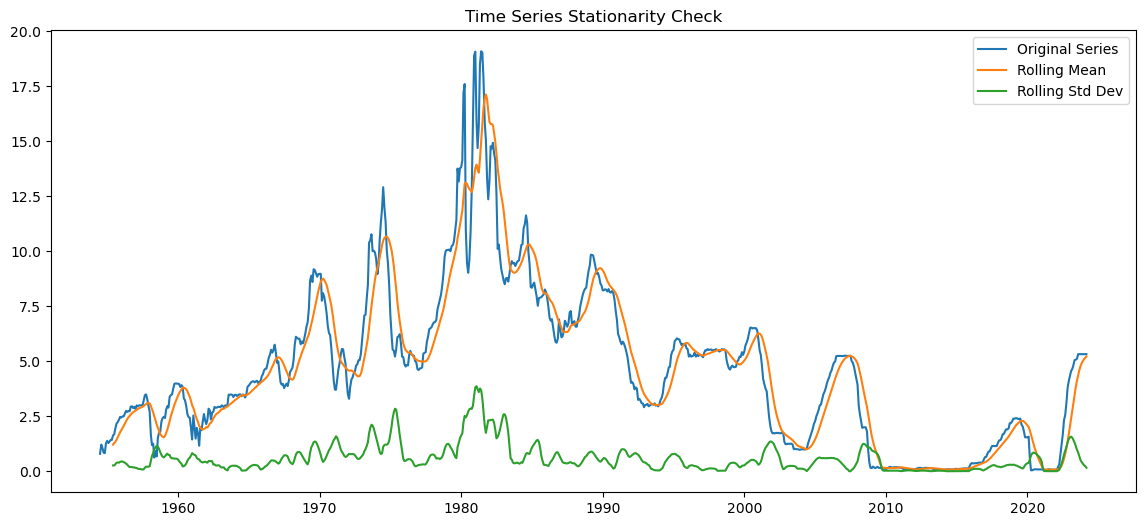

In [472]:
# Assume 'df' is your DataFrame with 'Date' as index
series = log_transformed_df['FEDFUNDS']  # replace with the actual column name for interest rates

# Check stationarity
check_stationarity(series)

# Plot the stationarity
plot_series_stationarity(series, window=12)

In [ ]:
# Perform the ADF test, ad save the 

In [473]:
# Export the completed dataframe, as a csv file into the : Completed_Dataframes folder, naming it log_transformed_df


log_transformed_df.to_csv('/Users/najibabounasr/Desktop/EJADA/Forecast Macroeconomic Trend/Data/Completed_Dataframes/log_transformed_df.csv')

